# Python-1, Лекция 4

Лектор: Хайбулин Даниэль

Подготовил материал: Хайбулин Даниэль

## Переменные - это не коробки!

У нас есть две переменные **a** и **b**. Мы присваиваем двум этим переменным список чисел:

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]

assert a == b

In [ ]:
a = [1, 2, 3]
b = a
b.append(4)
assert a == [1, 2, 3, 4]

Почему так происходит? Потому что мы не создали вторую коробку **b**, в которой хранится новый такой же список, а просто приклеили стикер **b** к уже созданному в памяти списку. Тут уже нужно быть аккуратными.

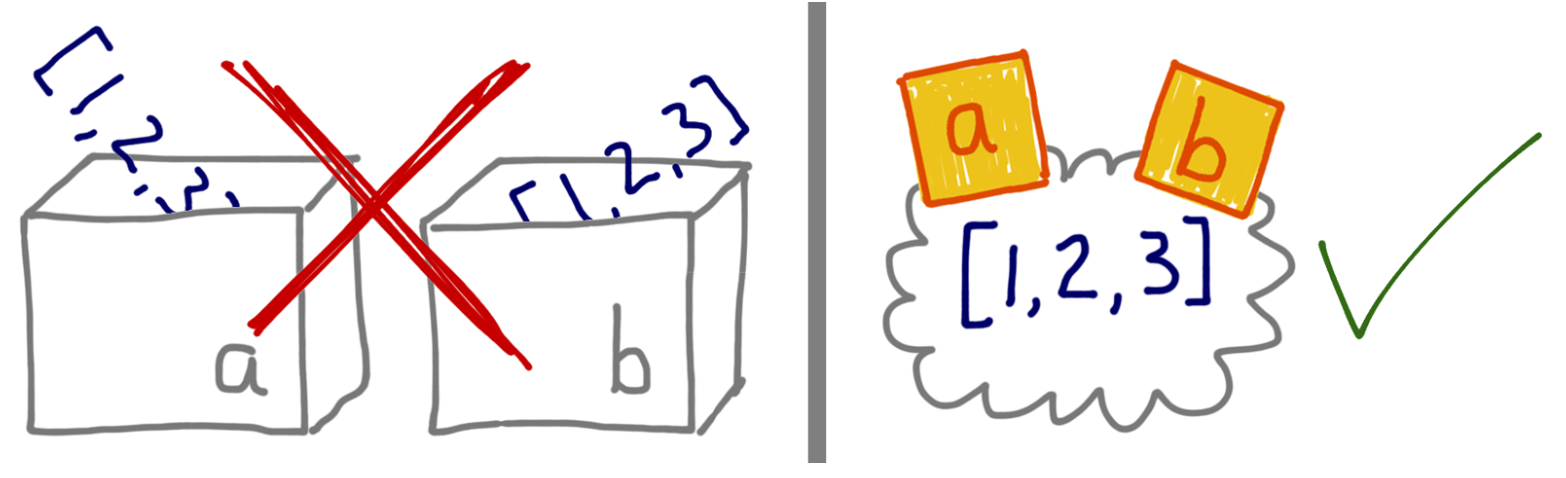

## Идентичность и равенство.

Раньше нам уже встречались **is** и **==** (на самом деле это dunder метод __eq__).

- is сравнивает id объектов.
- == сравнивает объекты реализованным у них методом сравнения.

Давайте рассмотрим пример как отыскать импостера:

In [ ]:
cookie = {"name": "Cookie", "color": "Grey", "size": "small"}
brownie = cookie
assert cookie is brownie

In [ ]:
id(cookie), id(brownie)

Как видим id cookie и brownie одинаковые. Это все о тех же стикерах на объект. Объект в итоге создался один. Конечно cookie также равен brownie:

In [ ]:
assert cookie == brownie

In [ ]:
cookie["age"] = 3
assert brownie["age"] == 3

In [ ]:
brownie

Опять же, по 'стикеру' cookie мы добавили словарю возраст: сам объект изменился. 'Стикер' brownie **указывает** на тот же самый объект, поэтому и в нем появился новый ключ.

Теперь добавим импостера:

In [ ]:
imposter = {"name": "Cookie", "color": "Grey", "size": "small", "age": 3}
assert cookie == imposter

In [ ]:
assert imposter is not cookie

In [ ]:
id(cookie), id(imposter)

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Равные объекты, но сами объекты в памяти уже разные, так как айди у них отличаются!
    </span>
</div>

## Когда ==, а когда is?

На самом деле чаще всего мы используем сравнение, а не идентичность. 

Однако есть случаи когда правильно использовать **is**:

In [ ]:
a = 1
b = None
assert b is None
assert a is not None

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        is быстрее чем == так как его нельзя переопределить
    </span>
</div>

Однако не стоит обманываться скоростью и не нужно никогда проверять на равенствно объекты через is.

In [ ]:
a = 5
b = 5

assert a is b

id(a), id(b)

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Антипаттерн: сравнение объектов при помощи is!
    </span>
</div>

Конечно, такое сравнение может сработать на маленьких числах, которые изначально загружаются в память при запуске программы, однако, если немного увеличим числа, то все уже поломается:

In [ ]:
a = 1 << 10
b = 1 << 10
assert a is b, "Числа не равны"

In [ ]:
assert a == b
id(a), id(b)

Видим что в данном примере id уже разные.

## Относительная неизменяемость.

Теперь поговорим об изменяемых и неизменяемых типах.

Бытует мнение, что кортеж - неизменяемый тип данных. Это так, но есть одно но:

In [ ]:
t1 = (1, 2, [3, 4])
t2 = (1, 2, [3, 4])

In [ ]:
assert t1 == t2

In [ ]:
id(t1[-1])

Можем ли мы все-таки изменить кортеж?

In [ ]:
t1[-1].append(5)

<div style="
    background-color: #FFBA00;
    padding: 15px;
    border-left: 5px solid #ffcc00;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Кортеж можно изменить.
    </span>
</div>

In [ ]:
t1

In [ ]:
t1 == t2

Что произойдет с кортежем в данном случае?

In [ ]:
t = (1, 2, [3, 4])
t[-1] += [5, 6]

In [ ]:
t

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Операция += неатомарна. Код может упасть, но исходный объект изменится.
    </span>
</div>

## Копии объектов.

In [48]:
l1 = [1, [2, 3], (4, 5, 6)]
l2 = list(l1)

assert l2 == l1
assert l2 is not l1

Что здесь произошло?

Мы создаем новый список на основе первого, но уже делаем его копию, то есть создаем второй объект. Если изменим первый список, то второй не изменится.

In [50]:
l1.append(3)
l2

[1, [2, 3], (4, 5, 6)]